<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-02-Storytelling-With-Data/blob/master/module2-choose-appropriate-visualizations/LS_DS_122_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [75]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [92]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 20:27:56--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py.4’

misleading.py.4     100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 20:27:56 (155 MB/s) - ‘misleading.py.4’ saved [1641/1641]



#### Fix misleading plot #1

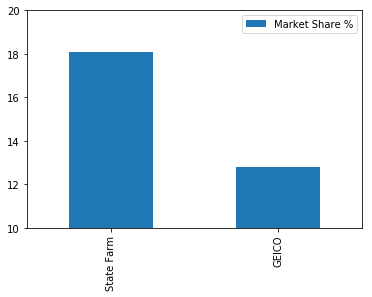

In [78]:
misleading.plot1()

In [81]:
#misleading??
18.07 / 12.79
(18.07 - 10) / (12.79 - 10)

2.892473118279571

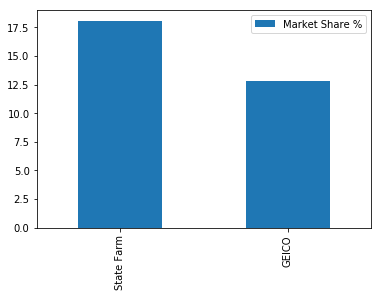

In [93]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})


def plot1():
    return insurance.plot.bar()
plot1()


#### Fix misleading plot #2

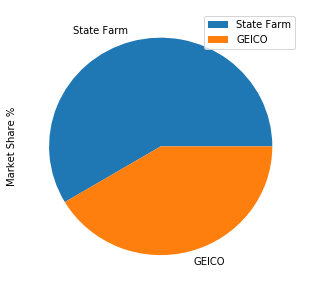

In [89]:
misleading.plot2()

In [0]:
misleading.plot2??

In [95]:
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


In [96]:
insurance.head()

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


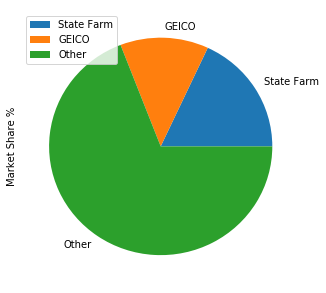

In [97]:
insurance.plot.pie('Market Share %', figsize=(5,5))

#### Fix misleading plot #3

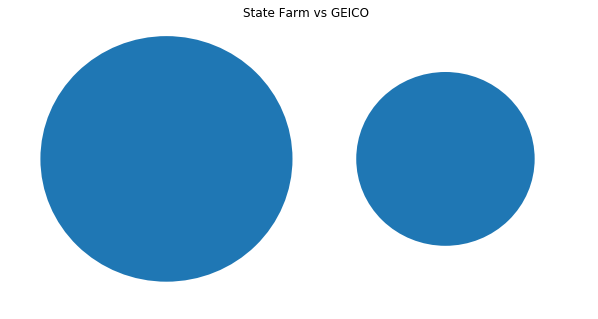

In [98]:
misleading.plot3()

In [0]:
misleading.plot3??

In [99]:
from math import pi
from math import sqrt
(pi*18.07**2) / (pi*12.79**2)

1.9960674662146263

In [0]:
sqrt(18.07)**2 / sqrt(12.79)**2
scale = 18.07 / sqrt(18.07)

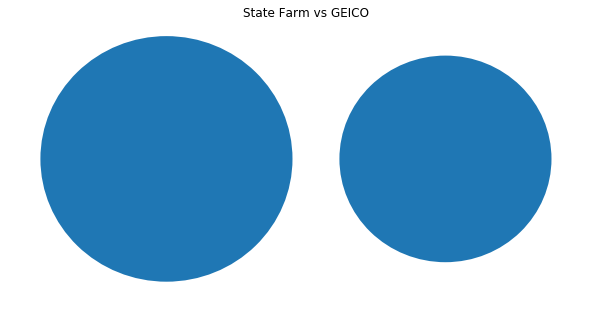

In [101]:
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=scale*sqrt(18.07))
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=scale*sqrt(12.79))
ax.add_artist(circle)

plt.title('State Farm vs GEICO')
plt.show()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
#import altair as alt
#alt.renderers.enable('notebook')

In [0]:
import altair as alt
from vega_datasets import data
dir(alt.Chart)

In [0]:
def plot4():
    # Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
#     import altair as alt
#     from vega_datasets import data

    url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
    df = pd.read_csv(url)
    df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
    variable = 'State Farm policy premiums'

    states = alt.topo_feature(data.us_10m.url, 'states')

    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )
  
plot4() 

In [0]:
misleading.plot4()

In [0]:
misleading.plot4??

In [208]:
url = 'https://raw.githubusercontent.com/zarrinan/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.info()
df['share'] = df['State Farm policy premiums']/df['STATE TOTAL']
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
state                         52 non-null object
id                            52 non-null int64
State Farm policy premiums    52 non-null int64
BERKSHIRE HATHAWAY GRP        52 non-null int64
STATE TOTAL                   52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,share
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [209]:
variable = 'State Farm policy premiums'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')
df.describe()
df

### See the data's shape

In [0]:
df.shape

### See the data

In [0]:
df.head()

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [133]:
groups = df.groupby('dataset', sort=True)


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [134]:
groups['dataset'].count()

dataset
I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [135]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [136]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [137]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [138]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [139]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

In [0]:
#pd.plotting.scatter_matrix(df);

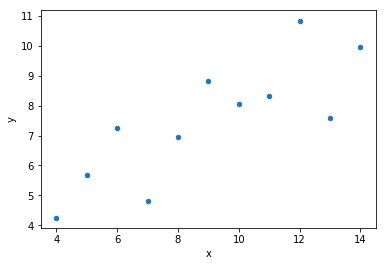

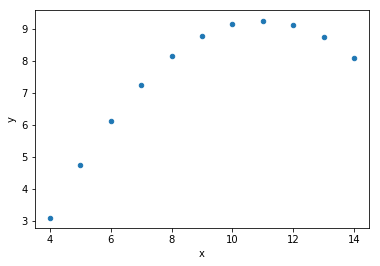

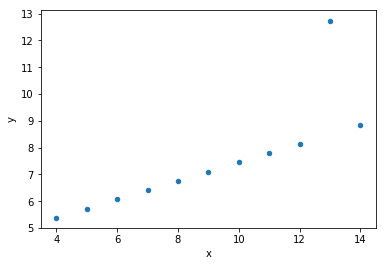

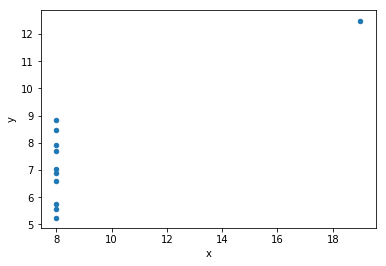

In [144]:
groups.plot('x', 'y', kind='scatter');
# axes = groups.plot('x','y', kind='scatter');
# axes[0].set_title('Dataset I')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

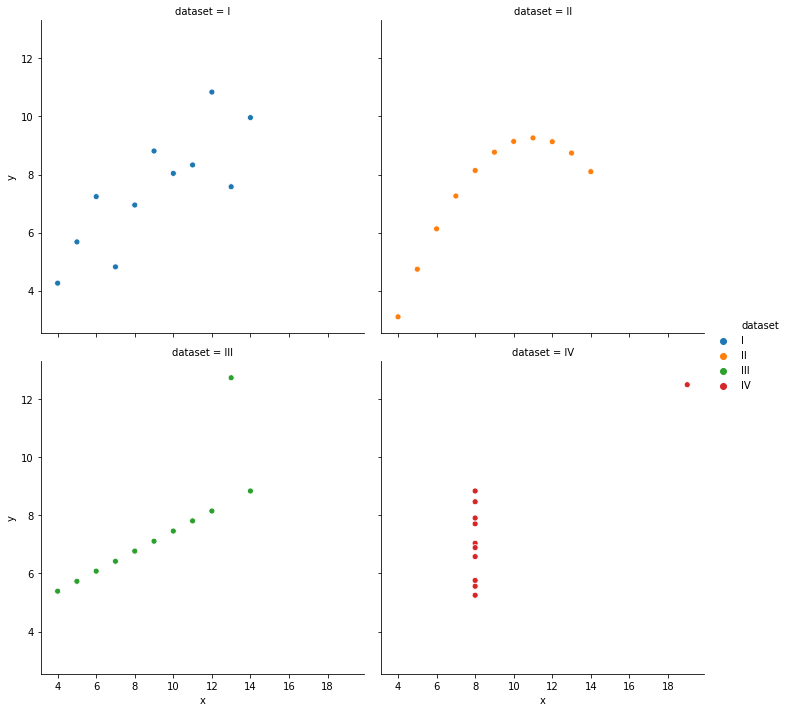

In [145]:
import seaborn as sns
sns.relplot(x='x', y='y', col='dataset', col_wrap=2, hue='dataset', data=df)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

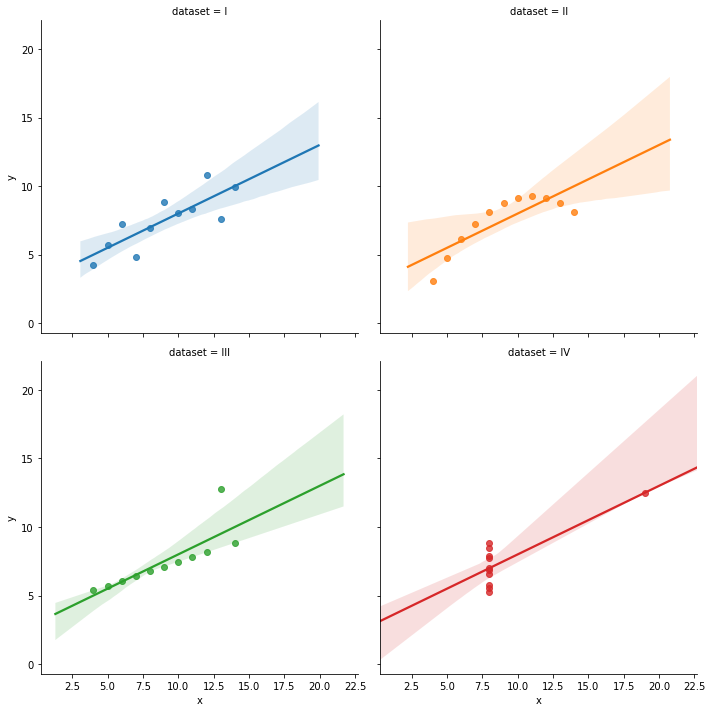

In [60]:
sns.lmplot(x='x', y='y', col='dataset', col_wrap=2, hue='dataset', data=df)

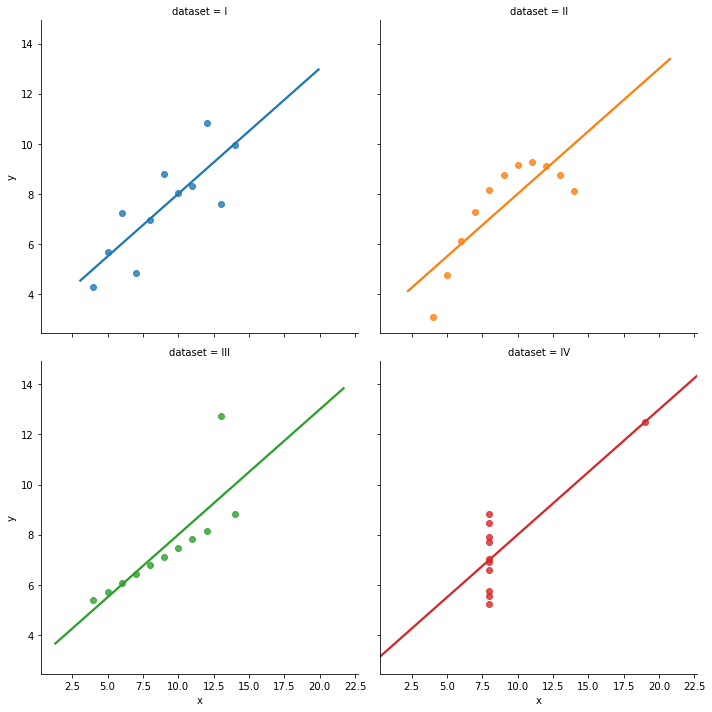

In [64]:
sns.lmplot(x='x', y='y',  col='dataset',col_wrap=2, hue='dataset', ci=None, data=df)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [154]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [147]:
tips.describe(include='all')
#or, for example, exclude=np.number

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### See the data's shape

In [148]:
tips.shape

(244, 7)

### See the first 5 rows

In [149]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Describe the data

In [150]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [0]:
tips['percentage'] = tips.tip / tips.total_bill

In [156]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

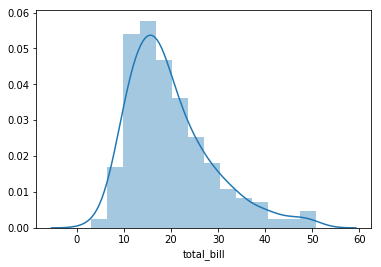

In [151]:
sns.distplot(tips.total_bill);

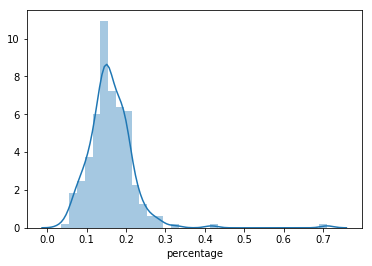

In [158]:
sns.distplot(tips.percentage);

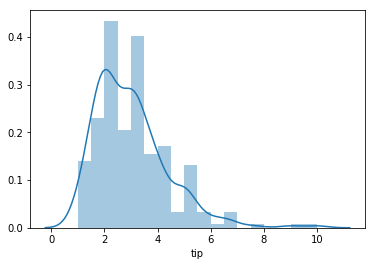

In [160]:
sns.distplot(tips.tip)

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

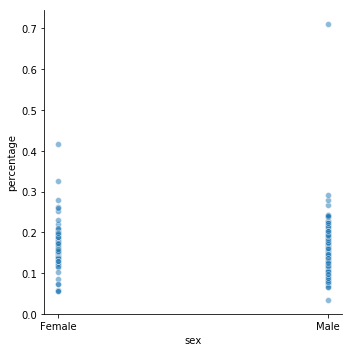

In [163]:
sns.relplot('sex','percentage', data=tips, alpha=0.5)

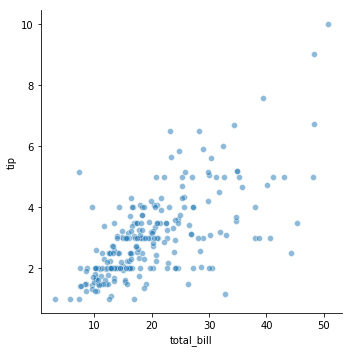

In [164]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

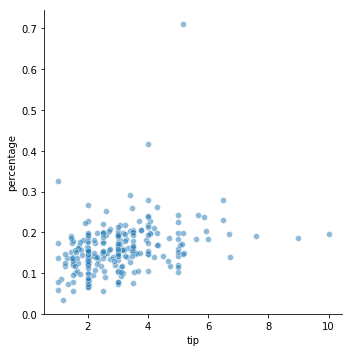

In [169]:
sns.relplot('tip', 'percentage', data=tips, alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [170]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

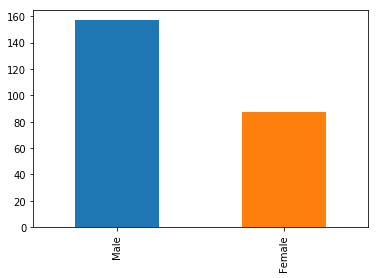

In [171]:
tips.sex.value_counts().plot.bar();

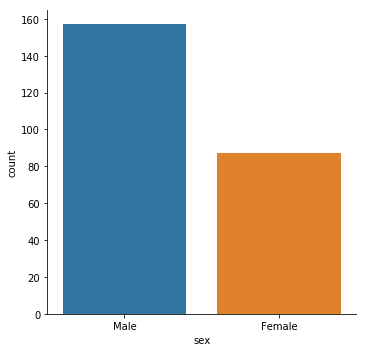

In [173]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

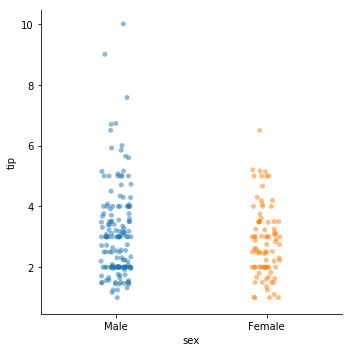

In [179]:
sns.catplot('sex', 'tip', data=tips, alpha=0.5)

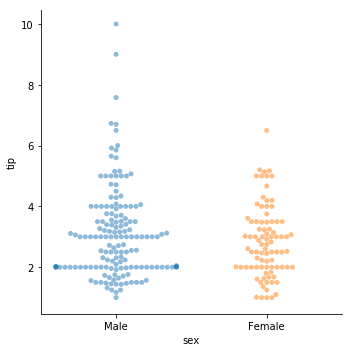

In [180]:
sns.catplot('sex', 'tip', data=tips, alpha=0.5, kind='swarm')

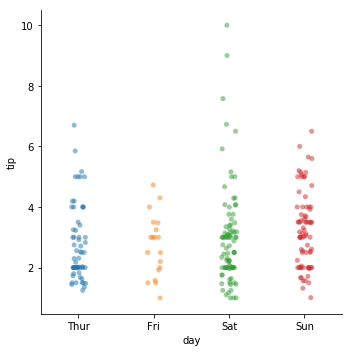

In [183]:
sns.catplot('day','tip', data=tips, alpha=0.5)

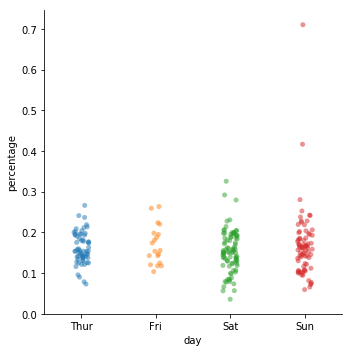

In [184]:
sns.catplot('day','percentage', data=tips, alpha=0.5)

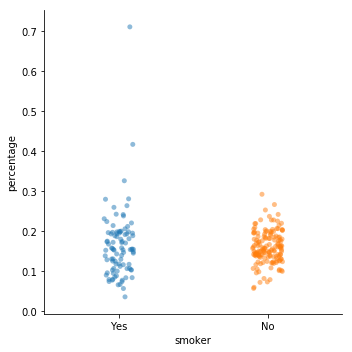

In [185]:
sns.catplot('smoker', 'percentage', data=tips, alpha=0.5)

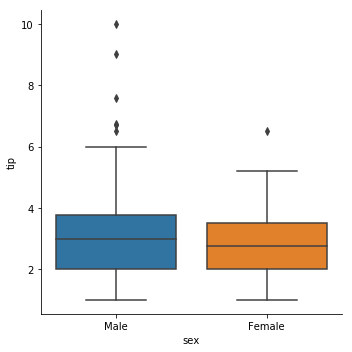

In [181]:
sns.catplot('sex', 'tip', data=tips, kind='box');

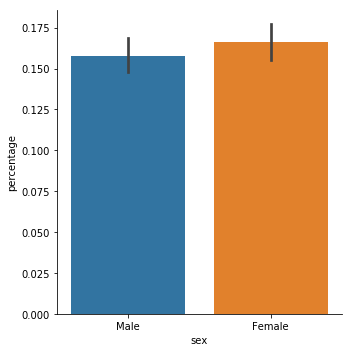

In [187]:
sns.catplot('sex', 'percentage', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [0]:
fl = sns.load_dataset('flights')

### See the data's shape

In [190]:
fl.shape

(144, 3)

### See the first 5 rows

In [191]:
fl.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [193]:
fl.describe(include='all')

,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,December,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


### Plot year & passengers

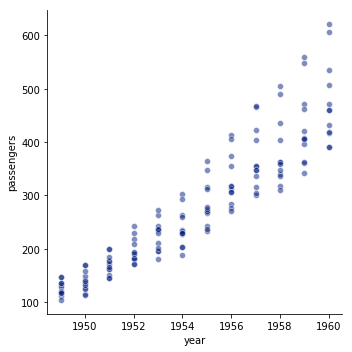

In [235]:
sns.set_palette('dark')
sns.relplot('year', 'passengers', data=fl, alpha=0.5);


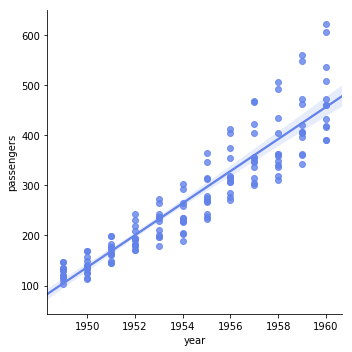

In [228]:
sns.set_palette("coolwarm", 7)
sns.lmplot('year', 'passengers', data=fl);

### Plot month & passengers

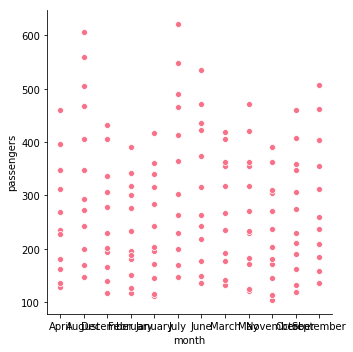

In [230]:
sns.set_palette('husl',8)
sns.relplot('month', 'passengers', data=fl)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [214]:
fl_pivot = pd.pivot_table(fl, index=['year', 'month'], margins=True)
fl_pivot

passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118
1950 January           115
     February          126
     March             141
     April             135
     May               125
     June              149
     July              170
     August            170
     September         158
     October           133
     November          114
     December          140
1951 January           145
     February          150
     March             178
     April             163
     May               172
     June              178
...                    ...
1958 August            505
     September         404
     October           359
     November          310
     December          337
1959 January           360
     February          342
     March             406
     April             396
     May               420
     June              472
     July              548
     August            559
     September         463
     October           407
     November          362
     December          405
1960 January           417
     February          391
     March             419
     April             461
     May               472
     June              535
     July              622
     August            606
     September         508
     October           461
     November          390
     December          432
All                    280

[145 rows x 1 columns]

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

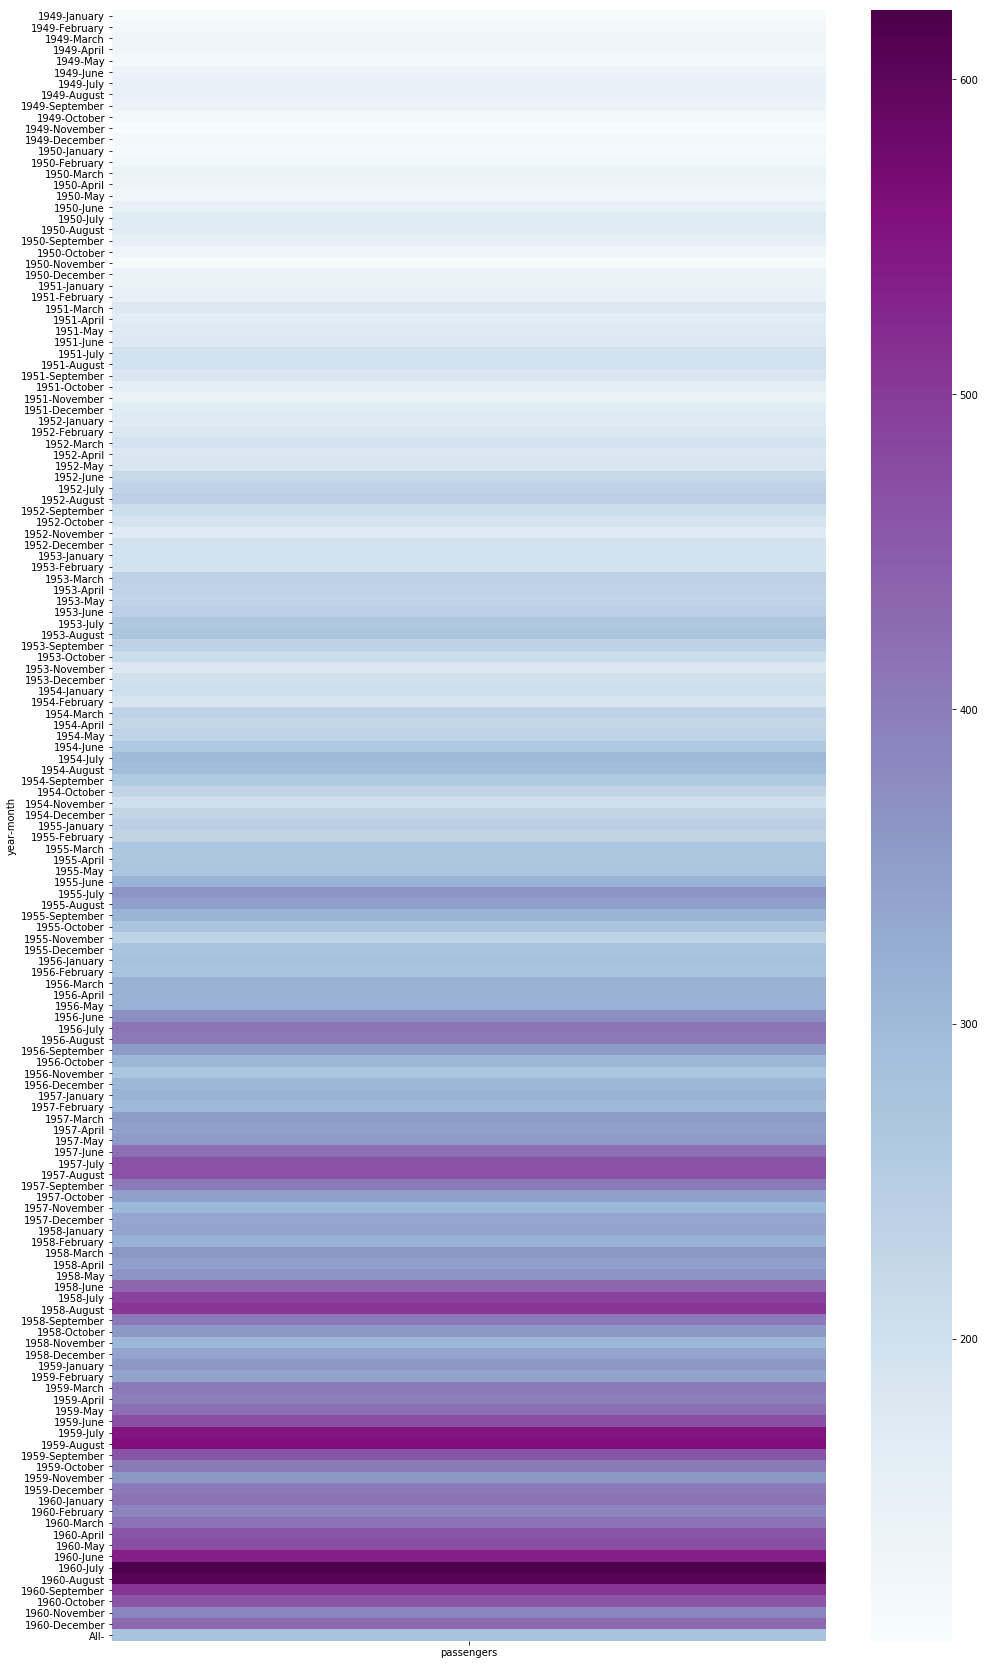

In [236]:
fig, ax = plt.subplots(figsize=(16,30))
sns.heatmap(fl_pivot, cmap="BuPu");